In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyabc

import os
import seaborn as sns


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
from matplotlib import rc
rc('font', **font)

In [2]:
psize=500
wsize=768
version=5
history_DLA=pyabc.History("sqlite:///" +
                          os.path.join("/home/felipe/testresults/Tumor",
                                       "TumorP"+str(psize)+"W"+str(wsize)+"DYNLA"+str(version)+".db"))

history_ORI=pyabc.History("sqlite:///" +
                          os.path.join("/home/felipe/testresults/Tumor",
                                       "TumorP"+str(psize)+"W"+str(wsize)+"ORI"+str(version)+".db"))

path = "/home/felipe/GitBackUps/Testresults/TumorModel/"+str(psize)+"_"+str(wsize)+"/Run"+str(version)
history_DLA.get_all_populations().to_csv(path+"/Tumor"+str(psize)+"AllPopLA.csv")
history_ORI.get_all_populations().to_csv(path+"/Tumor"+str(psize)+"AllPopOri.csv")

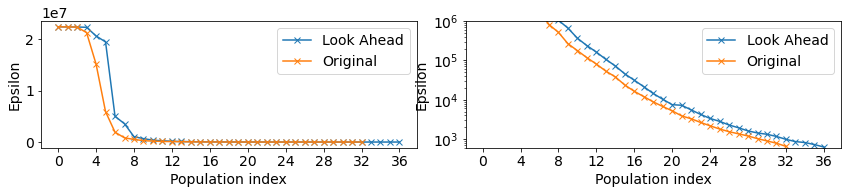

In [3]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax[0])
ax[0].set_title(None)


pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax[1])
ax[1].set_yscale("log")
ax[1].set_ylim(ymin=600,ymax=1000000)
ax[1].set_title(None)
#pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["DYNLA", "ORI"], ax=ax[2])
#ax[2].set_yscale("log")
#ax[2].set_ylim(ymin=600,ymax=10000)

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"Epsilons"+str(version)+".pdf")

/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(X, Y, PDF, **kwargs)
/home/felipe/pyABC/pyabc/visualization/kde.py:350: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

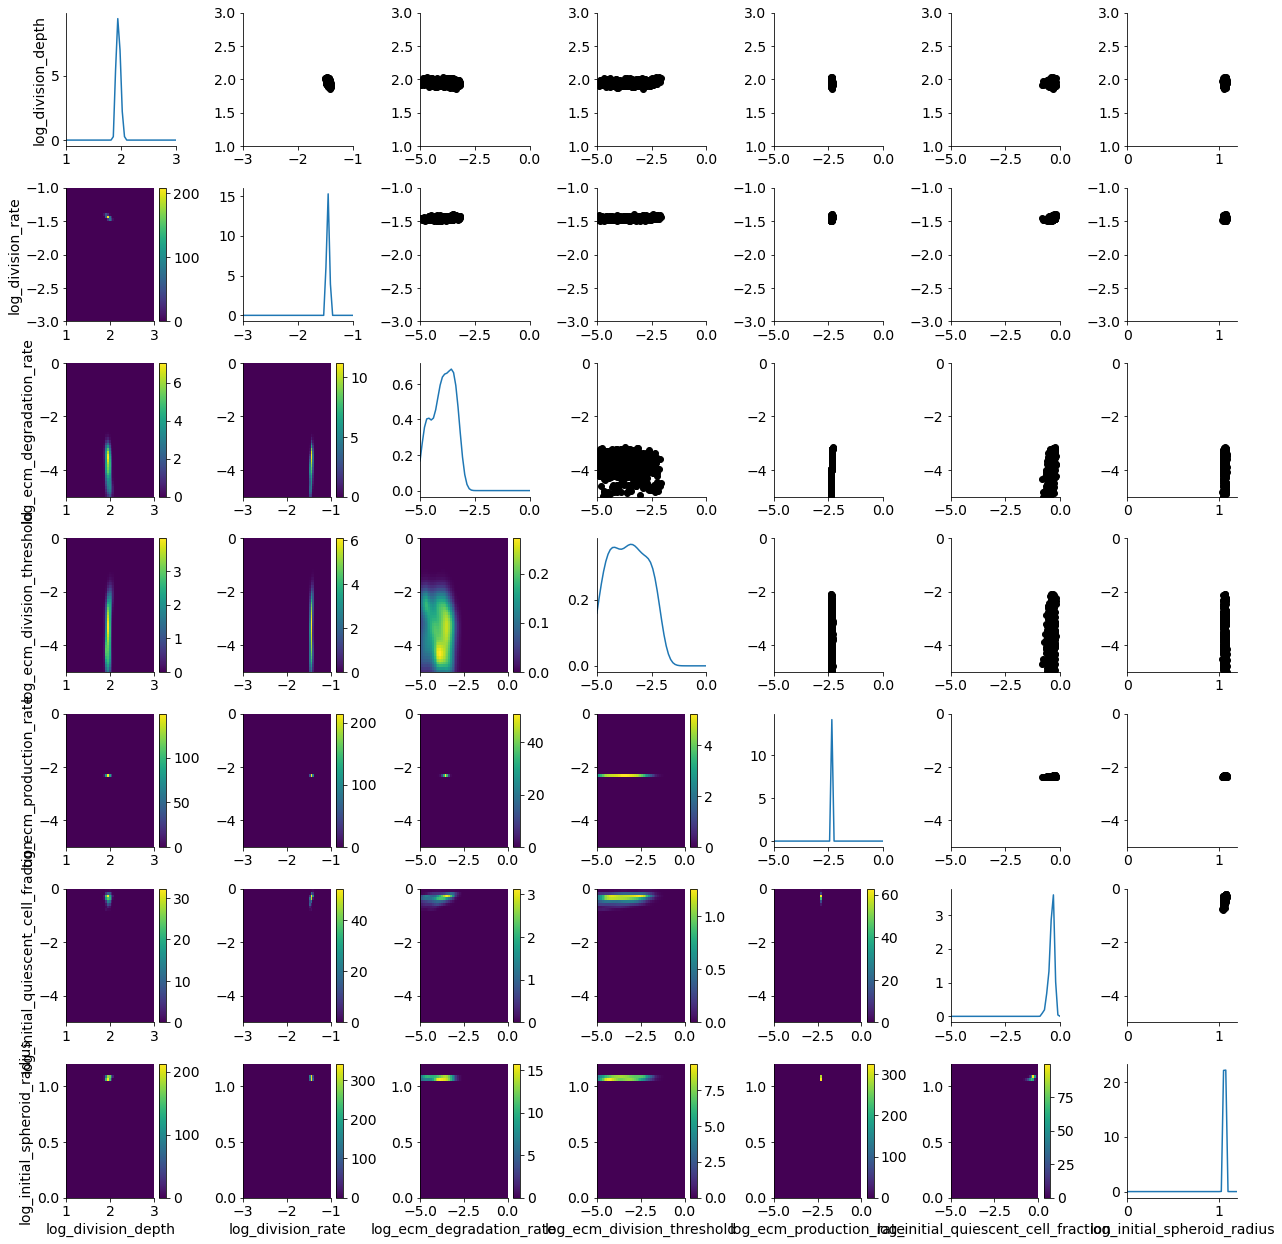

In [4]:
limits = dict(log_division_rate=(-3, -1),
              log_division_depth=(1, 3),
              log_initial_spheroid_radius=(0, 1.2),
              log_initial_quiescent_cell_fraction=(-5, 0),
              log_ecm_production_rate=(-5, 0),
              log_ecm_degradation_rate=(-5, 0),
              log_ecm_division_threshold=(-5, 0))


df, w = history_DLA.get_distribution(m=0, t=history_DLA.max_t)
pyabc.visualization.plot_kde_matrix(df, w, limits=limits);


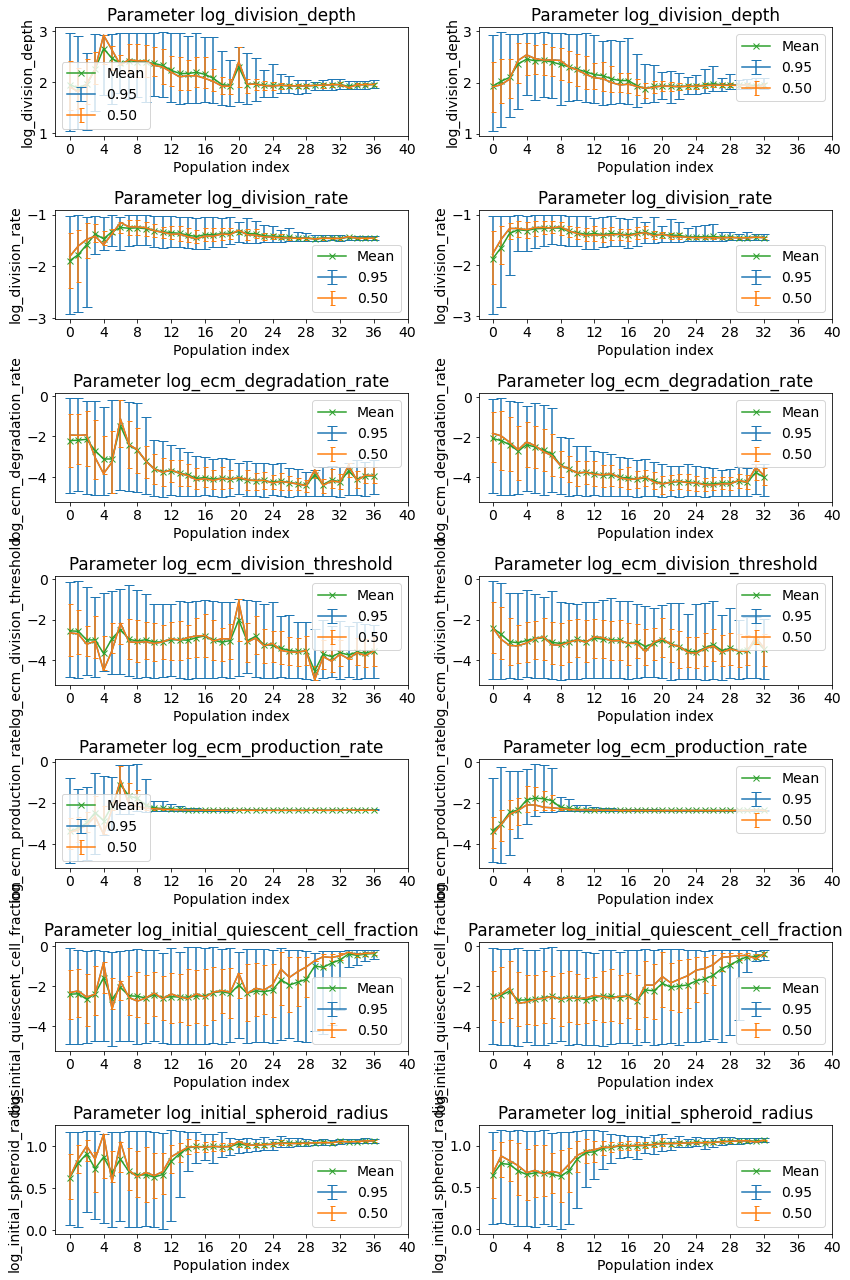

In [5]:
parameter_names=["log_division_depth",
                "log_division_rate",
                "log_ecm_degradation_rate",
                "log_ecm_division_threshold",
                "log_ecm_production_rate",
                "log_initial_quiescent_cell_fraction",
                "log_initial_spheroid_radius"]

fig = plt.figure(figsize=(12,18))

xticks = [0]
i=0
while i < len(history_DLA.get_all_populations()):
    i=i+4
    xticks.append(i)

for i in range(0,len(parameter_names)):
    ax = fig.add_subplot(len(parameter_names),2, 2*i+1)
    
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_xlabel("Population index")

    
    ax = fig.add_subplot(len(parameter_names),2, 2*i + 2)
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_xlabel("Population index")

    
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"CredibleIntervals"+str(version)+".pdf")

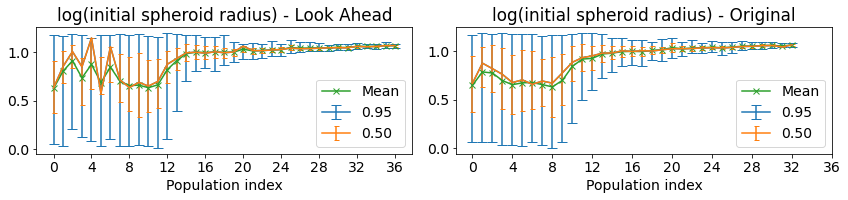

In [6]:
fig, axes = plt.subplots(1,2, figsize=(12, 3))

xticks = [0]
i=0
while i < len(history_DLA.get_all_populations())-2:
    i=i+4
    xticks.append(i)

for i in [6]:
    ax = axes[0]
    
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_title("log(initial spheroid radius) - Look Ahead")
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_ylabel(None)
    ax.set_xlabel("Population index")
    
    ax = axes[1]
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    ax.set_xlabel("Population index")

    
    ax.set_title("log(initial spheroid radius) - Original")
    ax.set_xticks(xticks)
    ax.set_ylabel(None)
    ax.set_xticklabels(xticks)
    
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"CI1Par"+str(version)+".pdf")

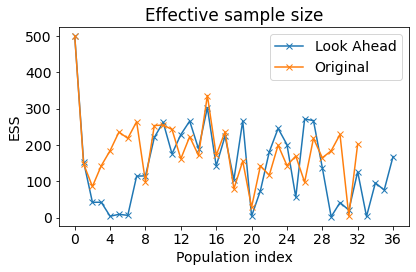

In [7]:
fig, ax = plt.subplots(1,1)

pyabc.visualization.plot_effective_sample_sizes([history_DLA, history_ORI], labels=["Look Ahead", "Original"], ax=ax)

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"EffSampleSize"+str(version)+".pdf")

In [8]:
DLADF = history_DLA.get_all_populations()
starttime = DLADF["population_end_time"][0]

new_col=[]
for i in range(0,len(DLADF)):
    new_col.append((DLADF["population_end_time"][i]-DLADF["population_end_time"][0]).total_seconds())
DLADF.insert(2, "time_passed_s", new_col, True)


ORIDF = history_ORI.get_all_populations()
starttime = ORIDF["population_end_time"][0]

new_col=[]
for i in range(0,len(ORIDF)):
    new_col.append((ORIDF["population_end_time"][i]-ORIDF["population_end_time"][0]).total_seconds())
ORIDF.insert(2, "time_passed_s", new_col, True)


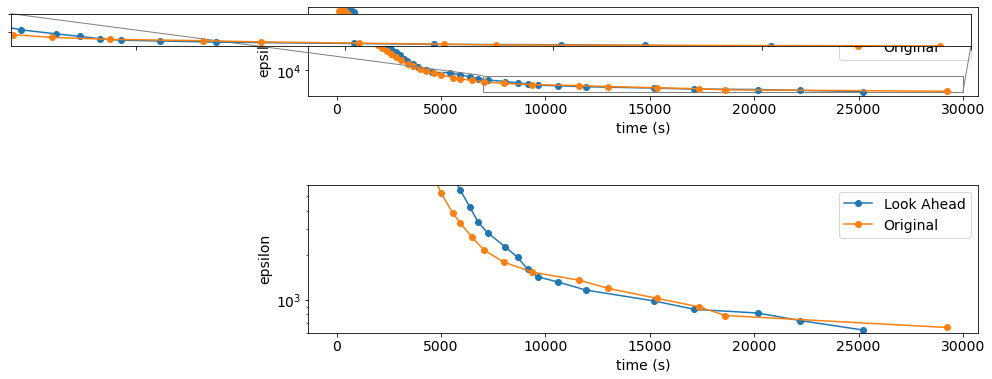

In [9]:
fig, axes = plt.subplots(2,1, figsize=(12,6))

ax = axes[0]

ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "Look Ahead", marker="o")
ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "Original", marker="o")

ax.set_yscale("log")
ax.set_ylabel("epsilon")
ax.set_xlabel("time (s)")
ax.legend()




from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

axins = zoomed_inset_axes(ax, 2)
axins.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "Look Ahead", marker="o")
axins.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "Original", marker="o")
axins.set_xlim(7000, 30000)
axins.set_ylim(600, 5000)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

box = ax.get_position()
ax.set_position([box.x0, box.y0+0.4*box.height, box.width, box.height * 0.6])
axins.set_position([box.x0, box.y0, box.width, box.height * 0.4])


ax = axes[1]

ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "Look Ahead", marker="o")
ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "Original", marker="o")

ax.set_yscale("log")

from matplotlib.ticker import NullFormatter
ax.yaxis.set_minor_formatter(NullFormatter())

ax.set_ylim(ymin=600, ymax=6000)
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
ax.set_ylabel("epsilon")
ax.set_xlabel("time (s)")

ax.legend()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"EpsilonOverTime"+str(version)+".pdf")

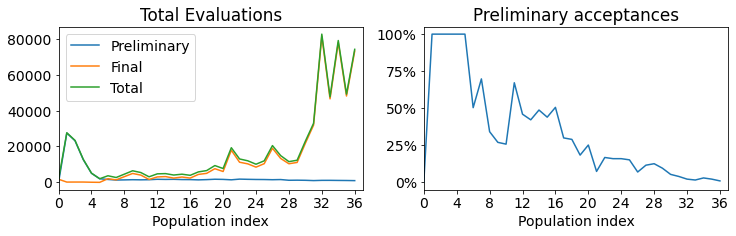

In [13]:
stat_df = pd.read_csv(path+"/TumorStats"+str(psize)+".csv")[1:]

fig, axes = plt.subplots(1,2, figsize=(12,3))


ax = axes[0]

ax.plot(stat_df['t'],stat_df['n_lookahead'], label="Preliminary")
ax.plot(stat_df['t'],stat_df['n_evaluated']-stat_df['n_lookahead'], label="Final")
ax.plot(stat_df['t'],stat_df['n_evaluated'], label="Total")

ax.title.set_text("Total Evaluations")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.legend()


ax = axes[1]

n_lookahead_particles=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_lookahead_particles[i]=min(500, stat_df['n_lookahead_accepted'][i+1])/500
    
ax.plot(stat_df['t'], n_lookahead_particles)

ax.title.set_text("Preliminary acceptances")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)


from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
"""
ax = axes[2]

n_total_acceptances=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_total_acceptances[i]=max(stat_df['n_accepted'][i+1], stat_df['n_lookahead_accepted'][i+1])

ax.plot(stat_df['t'], stat_df['n_lookahead_accepted']/stat_df['n_lookahead'], label='look_ahead')
ax.plot(stat_df['t'], n_total_acceptances/stat_df['n_evaluated'], label='total')


ax.title.set_text("Acceptance rates")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.legend()
"""


fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"Acceptances"+str(version)+".pdf")

In [11]:
history_DLA.get_all_populations()

,t,population_end_time,samples,epsilon,particles
0,-1,2021-01-04 21:26:46.567341,768,inf,1
1,0,2021-01-04 21:30:23.113048,1739,2.245950e+07,500
2,1,2021-01-04 21:33:17.359442,27635,2.243802e+07,500
3,2,2021-01-04 21:35:48.487070,23374,2.241825e+07,500
4,3,2021-01-04 21:37:44.705350,12861,2.236570e+07,500
5,4,2021-01-04 21:39:22.984102,5145,2.067648e+07,500
6,5,2021-01-04 21:40:31.576544,2034,1.951201e+07,500
7,6,2021-01-04 21:43:41.691186,3685,5.015104e+06,500
8,7,2021-01-04 21:46:40.545186,2719,3.556545e+06,500
9,8,2021-01-04 21:51:27.657514,4584,1.046493e+06,500


In [12]:
eps = [2.5e+07]
while eps[-1]>1000:
    eps.append(eps[-1]*0.8)

print(eps)
len(eps)

[25000000.0, 20000000.0, 16000000.0, 12800000.0, 10240000.0, 8192000.0, 6553600.0, 5242880.0, 4194304.0, 3355443.2, 2684354.5600000005, 2147483.6480000005, 1717986.9184000005, 1374389.5347200006, 1099511.6277760004, 879609.3022208004, 703687.4417766404, 562949.9534213123, 450359.96273704985, 360287.9701896399, 288230.3761517119, 230584.30092136955, 184467.44073709566, 147573.95258967654, 118059.16207174124, 94447.329657393, 75557.8637259144, 60446.29098073152, 48357.03278458522, 38685.62622766818, 30948.500982134545, 24758.800785707637, 19807.040628566112, 15845.63250285289, 12676.506002282313, 10141.20480182585, 8112.963841460681, 6490.371073168545, 5192.296858534836, 4153.837486827869, 3323.0699894622953, 2658.4559915698364, 2126.7647932558693, 1701.4118346046955, 1361.1294676837565, 1088.9035741470052, 871.1228593176043]


47